In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
economicas = pd.read_csv('/content/economicas.csv')
economicas

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,NaN,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,EK202120232172,2001,ANÁLISIS ECONÓMICO,151,2,S,CC,COLOMBIA,M,18/03/1996,...,3.0,93,87,196,93,98,75.589753,4.0,4,PUBLICAR
3851,EK202120320571,2001,ANÁLISIS ECONÓMICO,162,3,S,CC,COLOMBIA,F,26/07/2000,...,3.0,80,69,192,90,97,75.346915,4.0,4,PUBLICAR
3852,EK202120313923,2001,ANÁLISIS ECONÓMICO,0,1,S,CC,COLOMBIA,F,30/01/1989,...,3.0,71,57,158,47,70,48.890151,2.0,2,PUBLICAR
3853,EK202120281981,2001,ANÁLISIS ECONÓMICO,110,1,S,CC,COLOMBIA,F,23/04/1998,...,1.0,14,9,117,6,15,43.091355,1.0,2,PUBLICAR


In [ ]:
economicas.shape

(3855, 97)

In [ ]:
economicas.isnull().sum()

ESTU_CONSECUTIVO              0
RESULT_CODIGOPRUEBA           0
RESULT_NOMBREPRUEBA           0
RESULT_PUNTAJE                0
RESULT_DESEMPENO              0
                           ... 
PERCENTIL_GLOBAL              0
ESTU_INSE_INDIVIDUAL        131
ESTU_NSE_INDIVIDUAL         131
ESTU_NSE_IES                  0
ESTU_ESTADOINVESTIGACION      0
Length: 97, dtype: int64

In [ ]:
economicas_df = economicas[['RESULT_PUNTAJE', 'PUNT_GLOBAL']]

In [ ]:
economicas_df

,RESULT_PUNTAJE,PUNT_GLOBAL
0,128,201
1,209,222
2,106,88
3,89,159
4,122,156
...,...,...
3850,151,196
3851,162,192
3852,0,158
3853,110,117


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = economicas_df.copy()

In [ ]:
X

,RESULT_PUNTAJE,PUNT_GLOBAL
0,128,201
1,209,222
2,106,88
3,89,159
4,122,156
...,...,...
3850,151,196
3851,162,192
3852,0,158
3853,110,117


In [ ]:
algoritmo = KMeans(n_clusters = 2, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

In [ ]:
algoritmo.fit(X)

KMeans(n_clusters=2)

In [ ]:
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [ ]:
muestra_prediccion = algoritmo.predict(economicas_df)
for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


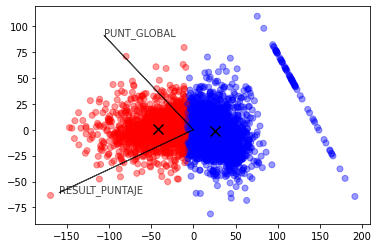

In [ ]:
from sklearn.decomposition import PCA
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

centroides_pca = modelo_pca.transform(centroides)

colores = ['blue', 'red']

colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, color = 'black')

xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = economicas_df.columns

for i in range(len(columnas)):

    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)

    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()

Conclusiones:

- Si hay una interconección entre el resultado de puntajes y el puntaje global, el cual se ve representado por la línea negra.
- El result_puntaje tiene datos "atípicos", que de manera apriori, se puede decir que son los puntajes más altos que no se acercan al  puntaje global.

In [ ]:
xvector

array([-159.43346928, -106.17461694])

In [ ]:
yvector

array([-60.72790806,  91.18997877])

In [ ]:
columnas

Index(['RESULT_PUNTAJE', 'PUNT_GLOBAL'], dtype='object')